In [58]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

In [59]:
# matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True)
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)

In [60]:
# matplotlib configuration for higher imaginary images
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [61]:
# load the dataset
data_dir = Path('../input/dl-course-data/')
ion = pd.read_csv(data_dir / "ion.csv", index_col = 0)
ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [62]:
ion.shape

(351, 35)

In [63]:
ion.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'Class'],
      dtype='object')

In [64]:
df = ion.copy()
df['Class'] = df['Class'].map({'good' : 0, 'bad': 1}) 

In [65]:
df_train = df.sample(frac = 0.7, random_state = 0)
df_valid = df.drop(df_train.index)

In [66]:
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
7,1,0,0.97588,-0.10602,0.94601,-0.208,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,0
53,1,0,1.00000,1.00000,1.00000,1.000,0.91010,1.00000,-0.26970,1.00000,...,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-0.34686,1.00000,0.34845,0
115,1,0,0.91353,0.81586,-0.72973,1.000,-0.39466,0.55735,0.05405,0.29730,...,0.00002,-0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
46,0,0,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,1.00000,1.00000,...,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1
107,1,0,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1


In [67]:
df_valid.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.0376,...,-0.51171,0.41078,-0.46168,0.21266,-0.3409,0.42267,-0.54487,0.18641,-0.45300,0
10,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.2681,...,-0.01326,0.20645,-0.02294,0.00000,0.0000,0.16595,0.24086,-0.08208,0.38065,1
24,0,0,-1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.0000,...,-1.00000,1.00000,-1.00000,1.00000,1.0000,-1.00000,1.00000,0.00000,0.00000,1
26,1,0,1.00000,0.57820,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.0000,...,-1.00000,1.00000,-1.00000,1.00000,-1.0000,1.00000,-1.00000,1.00000,-1.00000,1
29,1,0,1.00000,0.08380,1.00000,0.17387,1.00000,-0.13308,0.98172,0.6452,...,1.00000,0.83899,1.00000,0.74822,1.0000,0.64358,1.00000,0.52479,1.00000,0


In [68]:
max_ = df.max(axis = 0)
min_ = df.min(axis = 0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis = 1, inplace = True)
df_valid.dropna(axis = 1, inplace = True)

X_train = df_train.drop('Class', axis = 1)
X_valid = df_train.drop('Class', axis = 1)
y_train = df_train.Class
y_valid = df_train.Class

In [69]:
df_train.shape

(246, 34)

In [75]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('../input/dl-course-data/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [76]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [77]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [78]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/1000
1/1 [==============================] - 1s 898ms/step - loss: 0.7529 - binary_accuracy: 0.4065 - val_loss: 0.8120 - val_binary_accuracy: 0.2381
Epoch 2/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7498 - binary_accuracy: 0.4065 - val_loss: 0.8067 - val_binary_accuracy: 0.2381
Epoch 3/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7468 - binary_accuracy: 0.4065 - val_loss: 0.8017 - val_binary_accuracy: 0.2381
Epoch 4/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7439 - binary_accuracy: 0.4065 - val_loss: 0.7968 - val_binary_accuracy: 0.2381
Epoch 5/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7411 - binary_accuracy: 0.4065 - val_loss: 0.7920 - val_binary_accuracy: 0.2381
Epoch 6/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7385 - binary_accuracy: 0.4024 - val_loss: 0.7874 - val_binary_accuracy: 0.2381
Epoch 7/1000
1/1 [==============================] - 0s 33ms/step - lo

Best Validation loss: 0.2924 
Best Validation Accuracy: 0.8857


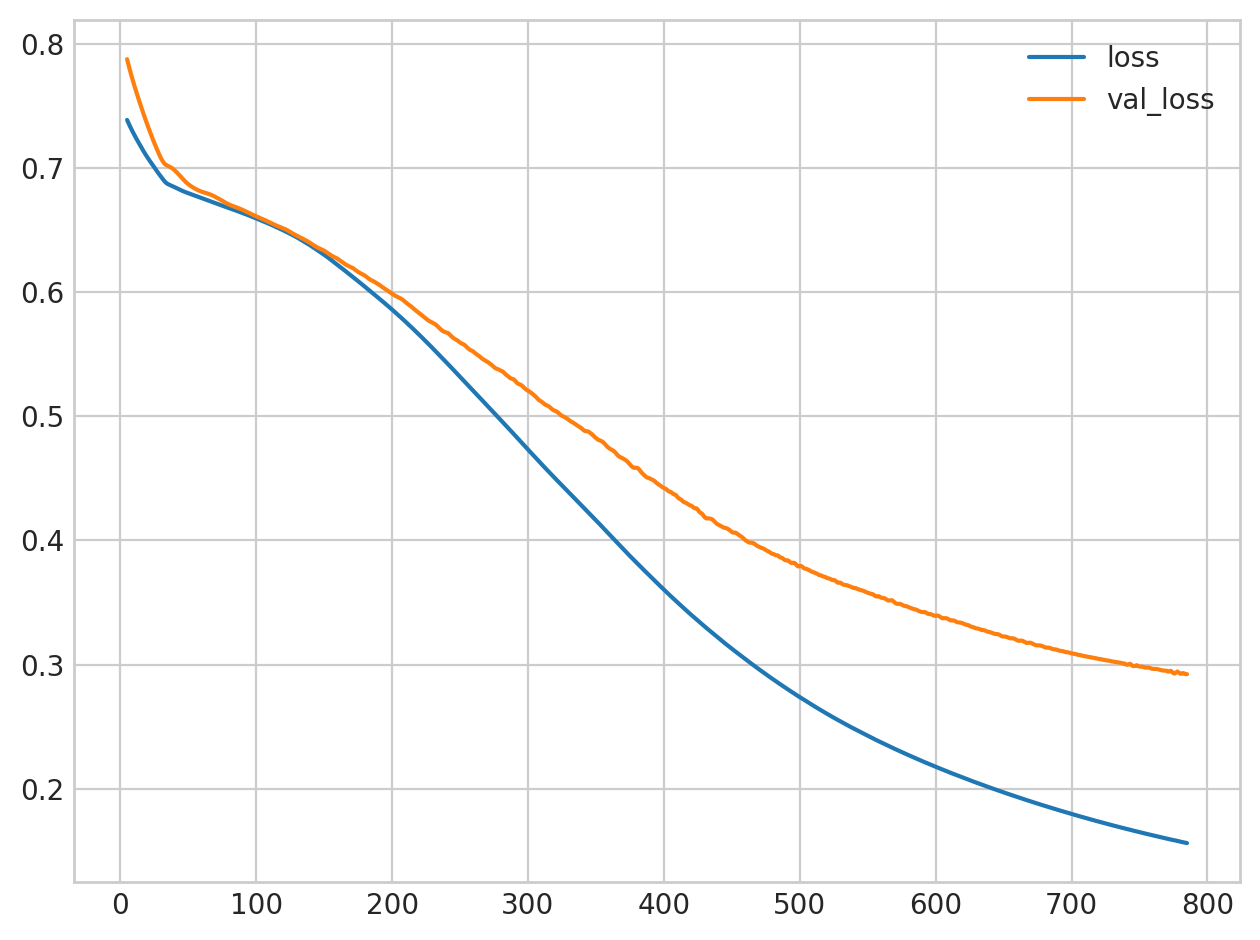

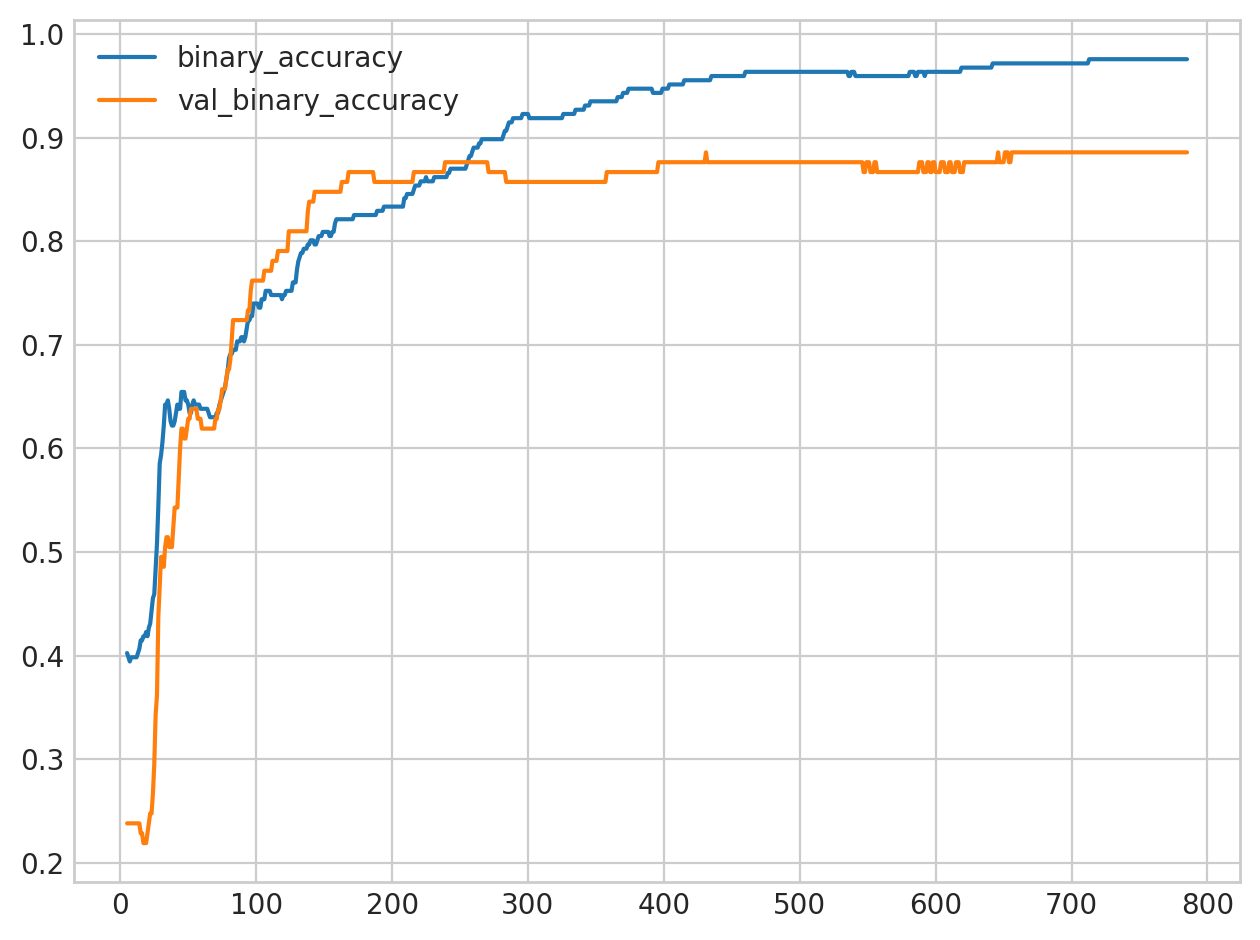

In [79]:
history_df = pd.DataFrame(history.history)
#start the plot at epoch 5
history_df.loc[5:,['loss','val_loss']].plot()
history_df.loc[5:,['binary_accuracy','val_binary_accuracy']].plot()

print(f"Best Validation loss: {history_df['val_loss'].min():0.4f}" +\
      f" \nBest Validation Accuracy: {history_df['val_binary_accuracy'].max():.4f}")